In [21]:
import numpy as np  # 向量化处理
import pandas as pd  # 处理dataframe
import matplotlib.pyplot as plt  # 画图seaborn pyecharts

In [ ]:
# 1.熟悉conda环境，配置conda环境，并且配套下载课程所需要的版本库
# 2.按市场和时间周期存储数据
# 3.熟悉不同存储方式的利与弊以及适用场景
# 4.熟悉pandas的基本操作
# 5.熟悉pandas的向量化处理

In [ ]:
# csv可视化、体积大不可压缩、读取速度慢
# h5可压缩，可分块读取，适用于储存tick数据或者长周期的历史数据 df.to_hdf() 更实用于存储海量数据
# feather、pickle 不常用 
# parquet非常适用于储存股票的面板数据

In [ ]:
# 加密货币数据下载地址
# https://data.binance.vision/

In [22]:
# 最简单的一个例子，读取csv文件
# CSV.GZ / PICKLE
z = pd.read_csv('510050.SH_15.csv')

In [23]:
z 
# 对dataframe组成元素进行认识columns index

,etime,open,high,low,close,volume
0,2005/2/23 9:45,0.6477,0.6484,0.6367,0.6433,292237380
1,2005/2/23 10:00,0.6426,0.6462,0.6426,0.6448,149050869
2,2005/2/23 10:15,0.6455,0.6455,0.6433,0.6440,95944065
3,2005/2/23 10:30,0.6440,0.6455,0.6426,0.6440,89684501
4,2005/2/23 10:45,0.6440,0.6470,0.6440,0.6462,63594170
...,...,...,...,...,...,...
69147,2022/11/29 14:00,2.6011,2.6060,2.5991,2.6041,25373019
69148,2022/11/29 14:15,2.6031,2.6080,2.6011,2.6021,37810520
69149,2022/11/29 14:30,2.6021,2.6060,2.6021,2.6041,26428800
69150,2022/11/29 14:45,2.6041,2.6110,2.6041,2.6070,54889200


In [24]:
# 演示几个基本的操作
z.rename(columns={'etime': 'timestamp'}, inplace=True) 
z

,timestamp,open,high,low,close,volume
0,2005/2/23 9:45,0.6477,0.6484,0.6367,0.6433,292237380
1,2005/2/23 10:00,0.6426,0.6462,0.6426,0.6448,149050869
2,2005/2/23 10:15,0.6455,0.6455,0.6433,0.6440,95944065
3,2005/2/23 10:30,0.6440,0.6455,0.6426,0.6440,89684501
4,2005/2/23 10:45,0.6440,0.6470,0.6440,0.6462,63594170
...,...,...,...,...,...,...
69147,2022/11/29 14:00,2.6011,2.6060,2.5991,2.6041,25373019
69148,2022/11/29 14:15,2.6031,2.6080,2.6011,2.6021,37810520
69149,2022/11/29 14:30,2.6021,2.6060,2.6021,2.6041,26428800
69150,2022/11/29 14:45,2.6041,2.6110,2.6041,2.6070,54889200


In [25]:
z = z.set_index('timestamp')  # 设置timestamp为索引
z

,open,high,low,close,volume
timestamp,,,,,
2005/2/23 9:45,0.6477,0.6484,0.6367,0.6433,292237380
2005/2/23 10:00,0.6426,0.6462,0.6426,0.6448,149050869
2005/2/23 10:15,0.6455,0.6455,0.6433,0.6440,95944065
2005/2/23 10:30,0.6440,0.6455,0.6426,0.6440,89684501
2005/2/23 10:45,0.6440,0.6470,0.6440,0.6462,63594170
...,...,...,...,...,...
2022/11/29 14:00,2.6011,2.6060,2.5991,2.6041,25373019
2022/11/29 14:15,2.6031,2.6080,2.6011,2.6021,37810520
2022/11/29 14:30,2.6021,2.6060,2.6021,2.6041,26428800


In [26]:
z.iloc[:2,:3]

,open,high,low
timestamp,,,
2005/2/23 9:45,0.6477,0.6484,0.6367
2005/2/23 10:00,0.6426,0.6462,0.6426


In [27]:
# 以上演示了dataframe的基本操作。不需要背住这些操作，只要会使用prompt即可

In [28]:
# 把文件转化成其他格式
z.to_excel('z_excel.xlsx') 
z.to_pickle('z_pickle.pkl')
z.to_feather('z_feather.feather')

In [29]:
import time
start_time = time.time()
data_15mins_csv = pd.read_csv('510050.SH_15.csv')
end_time_0 = time.time()
print('================================到此使用时间为： ', end_time_0 - start_time)
data_15mins_excel = pd.read_excel('z_excel.xlsx')
end_time_1 = time.time()
print('================================到此使用时间为： ', end_time_1 - end_time_0)
data_15mins_pkl = pd.read_pickle('z_pickle.pkl')
end_time_2 = time.time()
print('================================到此使用时间为： ', end_time_2 - end_time_1)
data_15mins_feather = pd.read_feather('z_feather.feather')
end_time_3 = time.time()
print('================================到此使用时间为： ', end_time_3 - end_time_2)

================================到此使用时间为：  0.0468599796295166
================================到此使用时间为：  2.5852034091949463
================================到此使用时间为：  0.012925386428833008
================================到此使用时间为：  0.03740549087524414


In [30]:
# 新增一列，计算昨日收盘到当日收盘的收益率
z

,open,high,low,close,volume
timestamp,,,,,
2005/2/23 9:45,0.6477,0.6484,0.6367,0.6433,292237380
2005/2/23 10:00,0.6426,0.6462,0.6426,0.6448,149050869
2005/2/23 10:15,0.6455,0.6455,0.6433,0.6440,95944065
2005/2/23 10:30,0.6440,0.6455,0.6426,0.6440,89684501
2005/2/23 10:45,0.6440,0.6470,0.6440,0.6462,63594170
...,...,...,...,...,...
2022/11/29 14:00,2.6011,2.6060,2.5991,2.6041,25373019
2022/11/29 14:15,2.6031,2.6080,2.6011,2.6021,37810520
2022/11/29 14:30,2.6021,2.6060,2.6021,2.6041,26428800


In [ ]:
# shift往前往后移，计算未来收益率和过去收益率
# 向量化计算
z['ret'] = (z['close']-z['close'].shift(1))/z['close'].shift(1)
z

,open,high,low,close,volume,ret
timestamp,,,,,,
2005/2/23 9:45,0.6477,0.6484,0.6367,0.6433,292237380,NaN
2005/2/23 10:00,0.6426,0.6462,0.6426,0.6448,149050869,0.002332
2005/2/23 10:15,0.6455,0.6455,0.6433,0.6440,95944065,-0.001241
2005/2/23 10:30,0.6440,0.6455,0.6426,0.6440,89684501,0.000000
2005/2/23 10:45,0.6440,0.6470,0.6440,0.6462,63594170,0.003416
...,...,...,...,...,...,...
2022/11/29 14:00,2.6011,2.6060,2.5991,2.6041,25373019,0.000769
2022/11/29 14:15,2.6031,2.6080,2.6011,2.6021,37810520,-0.000768
2022/11/29 14:30,2.6021,2.6060,2.6021,2.6041,26428800,0.000769


In [ ]:
# 计算成交量驱动的动量因子
# 成交量标准化后的动量因子
z['momentum_based_on_volume'] = (z['close']-z['open'])*z['volume']/(z['open'])

In [39]:
z

,open,high,low,close,volume,ret,momentum_based_on_volume
timestamp,,,,,,,
2005/2/23 9:45,0.6477,0.6484,0.6367,0.6433,292237380,NaN,-1.985247e+06
2005/2/23 10:00,0.6426,0.6462,0.6426,0.6448,149050869,0.002332,5.102893e+05
2005/2/23 10:15,0.6455,0.6455,0.6433,0.6440,95944065,-0.001241,-2.229529e+05
2005/2/23 10:30,0.6440,0.6455,0.6426,0.6440,89684501,0.000000,0.000000e+00
2005/2/23 10:45,0.6440,0.6470,0.6440,0.6462,63594170,0.003416,2.172472e+05
...,...,...,...,...,...,...,...
2022/11/29 14:00,2.6011,2.6060,2.5991,2.6041,25373019,0.000769,2.926418e+04
2022/11/29 14:15,2.6031,2.6080,2.6011,2.6021,37810520,-0.000768,-1.452519e+04
2022/11/29 14:30,2.6021,2.6060,2.6021,2.6041,26428800,0.000769,2.031344e+04


In [33]:
# 读取jm的数据 snapshot
z_jm = pd.read_hdf('jm2401.h5')
z_jm
# bp1 bv1 ap1 av1 bid price 1 bid volume 1 ask price 1 ask volume 1 

,bp1,bv1,ap1,av1,p,v,a,oi,type
time,,,,,,,,,
2023-09-04 08:59:00.009,1680.0,274,1680.5,6,1680.0,252,25401600,187905,3
2023-09-04 09:00:00.357,1681.5,4,1683.0,6,1683.0,125,12610860,187928,3
2023-09-04 09:00:00.851,1683.5,1,1685.0,47,1684.5,165,16663320,187889,5
2023-09-04 09:00:01.356,1683.5,2,1684.5,4,1684.5,73,7376160,187856,5
2023-09-04 09:00:01.835,1684.5,3,1685.0,2,1683.5,121,12227490,187867,4
...,...,...,...,...,...,...,...,...,...
2023-09-27 22:59:58.170,1861.0,28,1862.0,6,1862.0,24,2680800,179386,5
2023-09-27 22:59:58.678,1861.0,25,1861.5,3,1861.0,7,781770,179383,6
2023-09-27 22:59:59.160,1861.0,14,1861.5,6,1861.0,16,1786710,179383,8


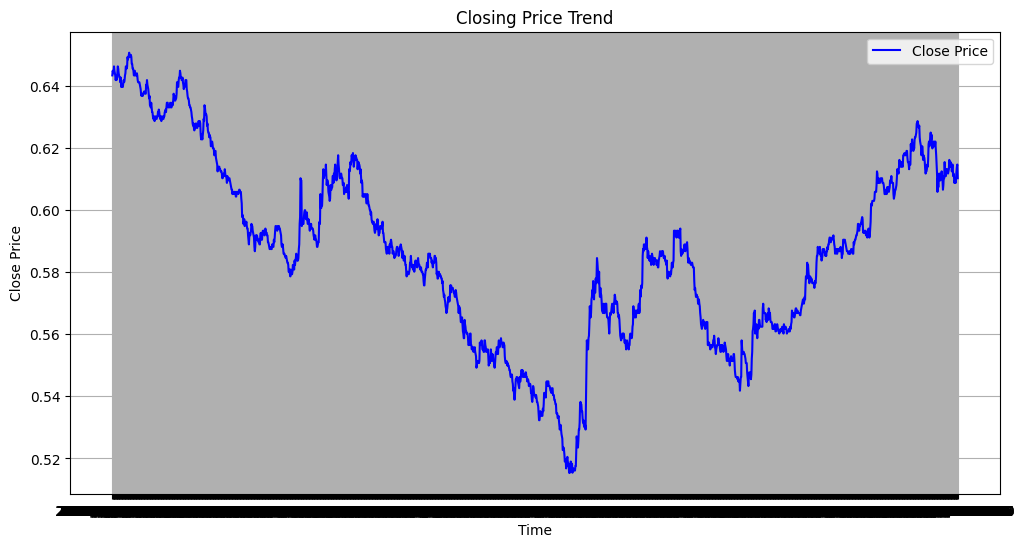

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(z.index[:2000], z['close'][:2000], label='Close Price', color='b')

plt.title('Closing Price Trend')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid()

# 显示图表
plt.show()


In [35]:
# 再看焦煤的切片数据
z_jm = pd.read_hdf('jm2401.h5')
z_jm

,bp1,bv1,ap1,av1,p,v,a,oi,type
time,,,,,,,,,
2023-09-04 08:59:00.009,1680.0,274,1680.5,6,1680.0,252,25401600,187905,3
2023-09-04 09:00:00.357,1681.5,4,1683.0,6,1683.0,125,12610860,187928,3
2023-09-04 09:00:00.851,1683.5,1,1685.0,47,1684.5,165,16663320,187889,5
2023-09-04 09:00:01.356,1683.5,2,1684.5,4,1684.5,73,7376160,187856,5
2023-09-04 09:00:01.835,1684.5,3,1685.0,2,1683.5,121,12227490,187867,4
...,...,...,...,...,...,...,...,...,...
2023-09-27 22:59:58.170,1861.0,28,1862.0,6,1862.0,24,2680800,179386,5
2023-09-27 22:59:58.678,1861.0,25,1861.5,3,1861.0,7,781770,179383,6
2023-09-27 22:59:59.160,1861.0,14,1861.5,6,1861.0,16,1786710,179383,8


In [36]:
# 再看一个crypto的trades数据
z_trades = pd.read_csv('D:/课程代码合集/高频因子和高频策略/Data/BTCUSDT-aggTrades-2024-10.zip')

In [37]:
z_trades

,agg_trade_id,price,quantity,first_trade_id,last_trade_id,transact_time,is_buyer_maker
0,2346580067,63309.0,0.037,5427633413,5427633416,1727740803861,True
1,2346580068,63309.1,2.184,5427633417,5427633422,1727740803875,False
2,2346580069,63309.0,0.120,5427633423,5427633426,1727740803877,True
3,2346580070,63309.1,0.013,5427633427,5427633427,1727740803906,False
4,2346580071,63309.0,0.051,5427633428,5427633428,1727740803908,True
...,...,...,...,...,...,...,...
37629331,2384209398,70321.9,0.028,5522940875,5522940875,1730419199069,True
37629332,2384209399,70322.0,0.015,5522940876,5522940877,1730419199118,False
37629333,2384209400,70322.0,0.001,5522940878,5522940878,1730419199227,False
37629334,2384209401,70321.9,0.001,5522940879,5522940879,1730419199462,True


In [38]:
# is buyer maker是否买方是挂单？是则这一笔单子是主动卖出，否则这一笔单子是主动买入